In [1]:
!pip install ktrain

In [2]:
!pip install vaderSentiment

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import string
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import ktrain
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-about-major-cryptocurrencies-20132018-40k/crypto_news_parsed_2018_validation.csv
/kaggle/input/news-about-major-cryptocurrencies-20132018-40k/crypto_news_parsed_2013-2017_train.csv


In [4]:
df_train = pd.read_csv("/kaggle/input/news-about-major-cryptocurrencies-20132018-40k/crypto_news_parsed_2013-2017_train.csv")

In [5]:
df_test = pd.read_csv("/kaggle/input/news-about-major-cryptocurrencies-20132018-40k/crypto_news_parsed_2018_validation.csv")

In [6]:
df_train["text"].describe()

count                                                 28066
unique                                                27737
top       The cryptocurrency markets were uncharacterist...
freq                                                      3
Name: text, dtype: object

In [7]:
df_test["text"].describe()

count                                                 11239
unique                                                11075
top       The Bytecoin price has risen sharply for the d...
freq                                                      3
Name: text, dtype: object

In [8]:
df_train.isna().sum()

url       0
title     0
text      3
html      0
year      0
author    0
source    0
dtype: int64

In [9]:
df_test.isna().sum()

url       0
title     0
text      0
html      0
year      0
author    0
source    0
dtype: int64

In [10]:
df_train

,url,title,text,html,year,author,source
0,https://www.ccn.com/bitcoin-price-update-will-...,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Priced in USD on Mt. GoxAbove is Gox p...,"<figure id=""attachment_4090"" style=""width: 838...",2013,Gordon Hall,altcoin_analysis
1,https://www.ccn.com/key-bitcoin-price-levels-w...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"The Bitcoin price up to 2013/12/14, with Fib l...","<figure id=""attachment_3961"" style=""width: 838...",2013,Gordon Hall,altcoin_analysis
2,https://www.ccn.com/national-australia-bank-ci...,"National Australia Bank, Citing Highly Flawed ...",National Australia Bank looms over Melbourne’s...,"<figure id=""attachment_5011"" style=""width: 750...",2013,Gordon Hall,altcoin_analysis
3,https://www.ccn.com/chinese-banking-ban-bitcoi...,Chinese Bitcoin Ban Driven by Chinese Banking...,Recent reports from China indicate there may b...,"<p><span style=""line-height: 1.5em;"">Recent re...",2013,Jonas Borchgrevink,altcoin_analysis
4,https://www.ccn.com/bitcoin-trade-update-opene...,Bitcoin Trade Update: Opened Position,"Opened 1st Bitcoin trade position, price curre...","<figure id=""attachment_4921"" style=""width: 750...",2013,Gordon Hall,altcoin_analysis
...,...,...,...,...,...,...,...
28064,http://forklog.net/hashcoins-to-replace-all-pa...,Hashcoins To Replace Multiple Passwords With O...,A modern human being has to remember dozens of...,<p>A modern human being has to remember dozens...,2017,,technologies
28065,https://www.ccn.com/bitcoin-futures-mirrors-tu...,Bitcoin Futures Mirrors Tulip Bubble Crash: UB...,A former U. S. Secret Service agent who was se...,<p>A former U.S. Secret Service agent who was ...,2017,Rebecca Campbell,uncategorized
28066,https://www.ccn.com/shanghai-targets-fintech-l...,Shanghai Targets Fintech Lead in China with Bl...,The head of Shanghai’s Financial Service Offic...,<p>The head of Shanghai’s Financial Service Of...,2017,Samburaj Das,uncategorized
28067,https://www.ccn.com/bitcoin-seen-50000-2018-vo...,Bitcoin seen at $50000 in 2018 as volatility p...,Crypto-currency experts are punting bitcoin pr...,<p>Crypto-currency experts are punting bitcoin...,2017,Tawanda Karombo,uncategorized


In [11]:
df_train[df_train["text"].duplicated(keep=False)]

,url,title,text,html,year,author,source
71,https://www.ccn.com/overstock-com-ceo-discusse...,Overstock.com CEO Discusses The Company Accept...,NaN,"<p><iframe width=""500"" height=""375"" src=""https...",2013,Jonas Borchgrevink,bitcoin_business
1293,https://www.ccn.com/review-antminer-s3-450-ghs...,Review: Antminer S3 450 gh/s Bitcoin ASIC Mine...,NaN,"<p>&nbsp;</p><b>Follow us on <a href=""https://...",2014,Scott Fargo,altcoin_mining
3110,https://www.ccn.com/bank-run-thailand-luckily-...,Bank Run In Thailand – Luckily Bitcoin Was Jus...,NaN,"</blockquote><p style=""text-align: center""> <a...",2014,Gordon Hall,news
6222,https://www.ccn.com/bitcoin-sports-betting-web...,Bitcoin Sports Betting Website Wins Positive F...,"Anthem Vault, which owns the Bitcoin-accepting...","<p><strong>Anthem Vault, which owns the Bitcoi...",2015,Justin OConnell,accepts_bitcoin
8114,https://www.ccn.com/bitcoin-price-scraping-bot...,Bitcoin Price Scraping The Bottom,"Bitcoin Price is, as usual, making use of ever...","<p><strong>Bitcoin Price is, as usual, making ...",2015,Venzen Khaosan,bitcoin_analysis
...,...,...,...,...,...,...,...
24685,https://www.ccn.com/arrested-wannacry-hero-den...,Arrested WannaCry Hero Denies Distributing Kro...,"Marcus Hutchins, a British cyber security expe...","<p><a href=""https://www.ccn.com/tag/marcus-hut...",2017,Lester Coleman,news
24692,https://www.ccn.com/social-trading-platform-et...,Social Trading Platform eToro Adds Support for...,"Aaron Lasher, the CMO and co-founder of Breadw...","<p>Aaron Lasher, the CMO and co-founder of <a ...",2017,Lester Coleman,news
24693,https://www.ccn.com/bitcoin-keeps-setting-new-...,Bitcoin Keeps Setting New Records after the co...,Ethereum and bitcoin prices led a comprehensiv...,<p>Ethereum and bitcoin prices led a comprehen...,2017,Josiah Wilmoth,news
24704,https://www.ccn.com/dan-bilzerian-bought-shitl...,Dan Bilzerian Tells 23 Million Followers His B...,Bitcoin exchange Bitstamp has announced that i...,"<p><span style=""font-weight: 400;"">Bitcoin exc...",2017,Josiah Wilmoth,news


In [12]:
df_train = df_train.drop_duplicates(subset=["text"])

In [13]:
df_train

,url,title,text,html,year,author,source
0,https://www.ccn.com/bitcoin-price-update-will-...,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Priced in USD on Mt. GoxAbove is Gox p...,"<figure id=""attachment_4090"" style=""width: 838...",2013,Gordon Hall,altcoin_analysis
1,https://www.ccn.com/key-bitcoin-price-levels-w...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"The Bitcoin price up to 2013/12/14, with Fib l...","<figure id=""attachment_3961"" style=""width: 838...",2013,Gordon Hall,altcoin_analysis
2,https://www.ccn.com/national-australia-bank-ci...,"National Australia Bank, Citing Highly Flawed ...",National Australia Bank looms over Melbourne’s...,"<figure id=""attachment_5011"" style=""width: 750...",2013,Gordon Hall,altcoin_analysis
3,https://www.ccn.com/chinese-banking-ban-bitcoi...,Chinese Bitcoin Ban Driven by Chinese Banking...,Recent reports from China indicate there may b...,"<p><span style=""line-height: 1.5em;"">Recent re...",2013,Jonas Borchgrevink,altcoin_analysis
4,https://www.ccn.com/bitcoin-trade-update-opene...,Bitcoin Trade Update: Opened Position,"Opened 1st Bitcoin trade position, price curre...","<figure id=""attachment_4921"" style=""width: 750...",2013,Gordon Hall,altcoin_analysis
...,...,...,...,...,...,...,...
28063,http://forklog.net/the-oracle-machine-aeternit...,The Oracle machine: Aeternity’s perspective on...,"April 6, Aeternity public pre-sale has ended d...","<p>April 6, Aeternity public pre-sale has ende...",2017,,technologies
28064,http://forklog.net/hashcoins-to-replace-all-pa...,Hashcoins To Replace Multiple Passwords With O...,A modern human being has to remember dozens of...,<p>A modern human being has to remember dozens...,2017,,technologies
28066,https://www.ccn.com/shanghai-targets-fintech-l...,Shanghai Targets Fintech Lead in China with Bl...,The head of Shanghai’s Financial Service Offic...,<p>The head of Shanghai’s Financial Service Of...,2017,Samburaj Das,uncategorized
28067,https://www.ccn.com/bitcoin-seen-50000-2018-vo...,Bitcoin seen at $50000 in 2018 as volatility p...,Crypto-currency experts are punting bitcoin pr...,<p>Crypto-currency experts are punting bitcoin...,2017,Tawanda Karombo,uncategorized


In [14]:
df_test[df_test["text"].duplicated(keep=False)]

,url,title,text,html,year,author,source
0,https://www.ccn.com/paris-hiltons-hotel-mogul-...,Paris Hilton’s Hotel Mogul Father to Sell $38 ...,A group of journalists who left The Denver Pos...,<p>A group of journalists who left The Denver ...,2018,Lester Coleman,accepts_bitcoin
6,https://www.ccn.com/south-koreas-largest-e-com...,South Korea’s Largest E-Commerce Platform is I...,"WeMakePrice, better known as Wemepu, one of So...","<p><span style=""font-weight: 400;"">WeMakePrice...",2018,Joseph Young,accepts_bitcoin
12,https://www.ccn.com/playboy-to-launch-its-own-...,"Playboy to Launch Its Own Cryptocurrency , Acc...","Playboy Enterprises, Inc. has announced it is ...","<p>Playboy Enterprises, Inc. has announced it ...",2018,Lester Coleman,accepts_bitcoin
16,https://www.ccn.com/japanese-luxury-car-dealer...,Japanese Luxury Car Dealer Accepts Bitcoin Pay...,The adhesion of the blockchain or distributed ...,<p>The adhesion of the blockchain or distribut...,2018,Cássio Gusson,accepts_bitcoin
31,https://www.ccn.com/collector-courts-bitcoin-m...,Collector Courts Bitcoin Millionaires for Reco...,"As an emerging technology, blockchain is growi...","<p>As an emerging technology, blockchain is gr...",2018,Iyke Aru,accepts_bitcoin
...,...,...,...,...,...,...,...
9388,https://www.ccn.com/indian-government-likely-t...,India’s Government Ramps Up Scrutiny of Crypto...,Taiwan’s Vice Premier has called for measures ...,<p>Taiwan’s Vice Premier has called for measur...,2018,Samburaj Das,news
9389,https://www.ccn.com/texas-officials-strike-bit...,Texas Officials Strike BitConnect with Cease a...,The cryptocurrency market cap achieved a new a...,<p>The cryptocurrency market cap achieved a ne...,2018,Josiah Wilmoth,news
9432,https://www.ccn.com/polymath-securities-platform/,This Ethereum Blockchain Platform Could Revolu...,Litecoin price posted one of the biggest gains...,"<p><a href=""https://www.ccn.com/tag/litecoin/""...",2018,Lester Coleman,news
10784,https://www.newsbtc.com/press-releases/intelli...,Cryptocurrency Trading Signals Bot Moves Out o...,"Cryptocurrency markets are volatile, and monit...","<span class=""entry-content""><p>Cryptocurrency...",2018,Gautham,press releases


In [15]:
df_test = df_test.drop_duplicates(subset=["text"])

In [16]:
df_test

,url,title,text,html,year,author,source
0,https://www.ccn.com/paris-hiltons-hotel-mogul-...,Paris Hilton’s Hotel Mogul Father to Sell $38 ...,A group of journalists who left The Denver Pos...,<p>A group of journalists who left The Denver ...,2018,Lester Coleman,accepts_bitcoin
1,https://www.ccn.com/playboy-sues-cryptocurrenc...,Playboy Sues Cryptocurrency Company for Breach...,"Playboy Enterprises, the parent company of Pla...","<p>Playboy Enterprises, the parent company of ...",2018,Jimmy Aki,accepts_bitcoin
2,https://www.ccn.com/microsoft-reboots-bitcoin-...,Microsoft Restores Bitcoin Payments after Temp...,Hardware and software giant Microsoft reported...,<p>Hardware and software giant Microsoft repor...,2018,Francisco Memoria,accepts_bitcoin
3,https://www.ccn.com/japans-gmo-launches-app-to...,Japan’s GMO Launches App to Reward Gamers in B...,"GMO Internet, a leading Japanese Internet serv...","<p>GMO Internet, a leading Japanese Internet s...",2018,Lester Coleman,accepts_bitcoin
4,https://www.ccn.com/japanese-building-in-tokyo...,547 Bitcoins: $6 Million Commercial Japanese B...,A Tokyo-based real estate firm is selling a sm...,"<p><span style=""font-weight: 400;"">A Tokyo-bas...",2018,Joseph Young,accepts_bitcoin
...,...,...,...,...,...,...,...
11234,https://www.coindesk.com/video-bitcoin-sign-gu...,Video: Bitcoin Sign Guy Tells All About Infamo...,"He might never spend a summer in D. C. again, ...",<p><em>This is an entry in CoinDesk's <a href=...,2018,Pete Rizzo,video
11235,https://www.coindesk.com/video-bitcoin-litecoi...,Video: Bitcoin or Litecoin? Charlie Lee on Whi...,The creator of the world's sixth-largest crypt...,<p><em>This is an entry in CoinDesk's <a href=...,2018,Pete Rizzo,video
11236,https://www.coindesk.com/video-two-bubbles-sha...,Video: Two Bubbles? ShapeShift CEO Talks Crypt...,This article is an entry in CoinDesk's Most In...,<p><em>This article is an entry in CoinDesk's ...,2018,CoinDesk,video
11237,https://www.coindesk.com/video-1-million-bitco...,Video: $1 Million? Bitcoin Sign Guy on Why It'...,This article is an entry in CoinDesk's Most In...,<p><em>This article is an entry in CoinDesk's ...,2018,CoinDesk,video


In [17]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [19]:
def build_row(row):
    compound_score = sentiment_analyzer.polarity_scores(str(row['text']))['compound']
    if compound_score <= -0.05:
        senti_score = 0
    elif compound_score > -0.05 and compound_score < 0.05:
        senti_score = 1
    elif compound_score >= 0.05:
        senti_score = 2
    return senti_score

In [20]:
df_train['sentiment_score'] = df_train.apply(lambda row: build_row(row), axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_test['sentiment_score'] = df_test.apply(lambda row: build_row(row), axis = 1)

In [22]:
df_train

,url,title,text,html,year,author,source,sentiment_score
0,https://www.ccn.com/bitcoin-price-update-will-...,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Priced in USD on Mt. GoxAbove is Gox p...,"<figure id=""attachment_4090"" style=""width: 838...",2013,Gordon Hall,altcoin_analysis,2
1,https://www.ccn.com/key-bitcoin-price-levels-w...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"The Bitcoin price up to 2013/12/14, with Fib l...","<figure id=""attachment_3961"" style=""width: 838...",2013,Gordon Hall,altcoin_analysis,2
2,https://www.ccn.com/national-australia-bank-ci...,"National Australia Bank, Citing Highly Flawed ...",National Australia Bank looms over Melbourne’s...,"<figure id=""attachment_5011"" style=""width: 750...",2013,Gordon Hall,altcoin_analysis,2
3,https://www.ccn.com/chinese-banking-ban-bitcoi...,Chinese Bitcoin Ban Driven by Chinese Banking...,Recent reports from China indicate there may b...,"<p><span style=""line-height: 1.5em;"">Recent re...",2013,Jonas Borchgrevink,altcoin_analysis,0
4,https://www.ccn.com/bitcoin-trade-update-opene...,Bitcoin Trade Update: Opened Position,"Opened 1st Bitcoin trade position, price curre...","<figure id=""attachment_4921"" style=""width: 750...",2013,Gordon Hall,altcoin_analysis,2
...,...,...,...,...,...,...,...,...
28063,http://forklog.net/the-oracle-machine-aeternit...,The Oracle machine: Aeternity’s perspective on...,"April 6, Aeternity public pre-sale has ended d...","<p>April 6, Aeternity public pre-sale has ende...",2017,,technologies,2
28064,http://forklog.net/hashcoins-to-replace-all-pa...,Hashcoins To Replace Multiple Passwords With O...,A modern human being has to remember dozens of...,<p>A modern human being has to remember dozens...,2017,,technologies,2
28066,https://www.ccn.com/shanghai-targets-fintech-l...,Shanghai Targets Fintech Lead in China with Bl...,The head of Shanghai’s Financial Service Offic...,<p>The head of Shanghai’s Financial Service Of...,2017,Samburaj Das,uncategorized,2
28067,https://www.ccn.com/bitcoin-seen-50000-2018-vo...,Bitcoin seen at $50000 in 2018 as volatility p...,Crypto-currency experts are punting bitcoin pr...,<p>Crypto-currency experts are punting bitcoin...,2017,Tawanda Karombo,uncategorized,2


In [23]:
df_test

,url,title,text,html,year,author,source,sentiment_score
0,https://www.ccn.com/paris-hiltons-hotel-mogul-...,Paris Hilton’s Hotel Mogul Father to Sell $38 ...,A group of journalists who left The Denver Pos...,<p>A group of journalists who left The Denver ...,2018,Lester Coleman,accepts_bitcoin,2
1,https://www.ccn.com/playboy-sues-cryptocurrenc...,Playboy Sues Cryptocurrency Company for Breach...,"Playboy Enterprises, the parent company of Pla...","<p>Playboy Enterprises, the parent company of ...",2018,Jimmy Aki,accepts_bitcoin,2
2,https://www.ccn.com/microsoft-reboots-bitcoin-...,Microsoft Restores Bitcoin Payments after Temp...,Hardware and software giant Microsoft reported...,<p>Hardware and software giant Microsoft repor...,2018,Francisco Memoria,accepts_bitcoin,2
3,https://www.ccn.com/japans-gmo-launches-app-to...,Japan’s GMO Launches App to Reward Gamers in B...,"GMO Internet, a leading Japanese Internet serv...","<p>GMO Internet, a leading Japanese Internet s...",2018,Lester Coleman,accepts_bitcoin,2
4,https://www.ccn.com/japanese-building-in-tokyo...,547 Bitcoins: $6 Million Commercial Japanese B...,A Tokyo-based real estate firm is selling a sm...,"<p><span style=""font-weight: 400;"">A Tokyo-bas...",2018,Joseph Young,accepts_bitcoin,2
...,...,...,...,...,...,...,...,...
11234,https://www.coindesk.com/video-bitcoin-sign-gu...,Video: Bitcoin Sign Guy Tells All About Infamo...,"He might never spend a summer in D. C. again, ...",<p><em>This is an entry in CoinDesk's <a href=...,2018,Pete Rizzo,video,0
11235,https://www.coindesk.com/video-bitcoin-litecoi...,Video: Bitcoin or Litecoin? Charlie Lee on Whi...,The creator of the world's sixth-largest crypt...,<p><em>This is an entry in CoinDesk's <a href=...,2018,Pete Rizzo,video,0
11236,https://www.coindesk.com/video-two-bubbles-sha...,Video: Two Bubbles? ShapeShift CEO Talks Crypt...,This article is an entry in CoinDesk's Most In...,<p><em>This article is an entry in CoinDesk's ...,2018,CoinDesk,video,0
11237,https://www.coindesk.com/video-1-million-bitco...,Video: $1 Million? Bitcoin Sign Guy on Why It'...,This article is an entry in CoinDesk's Most In...,<p><em>This article is an entry in CoinDesk's ...,2018,CoinDesk,video,2


In [26]:
x_train = df_train['text'][0:18001].values.tolist()
y_train = df_train['sentiment_score'][0:18001].values.tolist()
x_test = df_test['text'].values.tolist()
y_test = df_test['sentiment_score'].values.tolist()

In [27]:
(x_train,  y_train), (x_test, y_test), preproc = ktrain.text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=['0','1', '2'],
                                                                       preprocess_mode='bert',
                                                                       maxlen=512)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [28]:
model = ktrain.text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 512
done.


In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 512)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 512, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 512, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [28]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


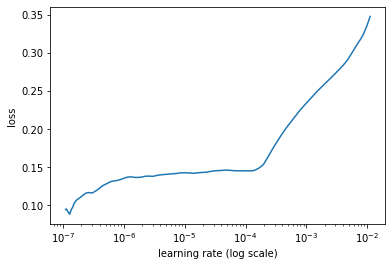

In [39]:
learner.lr_plot()

In [30]:
result = learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
3001/3001 [==============================] - 2535s 837ms/step - loss: 0.3200 - accuracy: 0.8721
Epoch 2/4
3001/3001 [==============================] - 2518s 839ms/step - loss: 0.2469 - accuracy: 0.9024
Epoch 3/4
3001/3001 [==============================] - 2518s 839ms/step - loss: 0.1702 - accuracy: 0.9371
Epoch 4/4
3001/3001 [==============================] - 2520s 840ms/step - loss: 0.0606 - accuracy: 0.9823


In [31]:
validate = learner.validate(val_data=(x_test, y_test), class_names=['0', '1', '2'])

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2114
           1       0.45      0.16      0.23        82
           2       0.93      0.93      0.93      8879

    accuracy                           0.89     11075
   macro avg       0.70      0.61      0.63     11075
weighted avg       0.89      0.89      0.89     11075



In [33]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [34]:
predictor.get_classes()

['0', '1', '2']

In [35]:
prediction = predictor.predict(df_test['text'].tolist())

In [3]:
print(prediction)

In [37]:
print(mean_squared_error(df_test['sentiment_score'], prediction))

0.42699774266365687


In [38]:
print(mean_absolute_error(df_test['sentiment_score'], prediction))

0.21733634311512415
